In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
df['income'].value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [95]:
# عشان احول القيم اللفظيه الى قيم رقميه
label = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label[column] = le
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,1
48838,64,9,321403,11,9,6,15,2,2,1,0,0,40,39,1
48839,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,1
48840,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,1


In [97]:
x = df.drop('income' , axis = 1)
y = df['income']
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)
x_encoded

<48842x29036 sparse matrix of type '<class 'numpy.float64'>'
	with 683788 stored elements in Compressed Sparse Row format>

In [98]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.85 , shuffle = True)
print(f'Data size : {len(df)}')
print(f'Train size : {len(x_train)}')
print(f'Test size : {len(x_test)}')

Data size : 48842
Train size : 41515
Test size : 7327


In [99]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [100]:
# USING LOGISTIC REGRESSION
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
m1_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy : {m1_accuracy*100}% ')
info = classification_report(y_test , y_pred)
print(f'Model Info : \n {info}')

Logistic Regression Accuracy : 52.90023201856149% 
Model Info : 
               precision    recall  f1-score   support

           0       0.54      0.96      0.69      3698
           1       0.00      0.00      0.00      1877
           2       0.45      0.27      0.34      1165
           3       0.00      0.00      0.00       587

    accuracy                           0.53      7327
   macro avg       0.25      0.31      0.26      7327
weighted avg       0.34      0.53      0.40      7327



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [101]:
gg = y_test - y_pred
gg

,income
26513,0
5455,0
44623,3
13303,2
42941,3
...,...
15851,0
24153,0
1438,0
28920,0


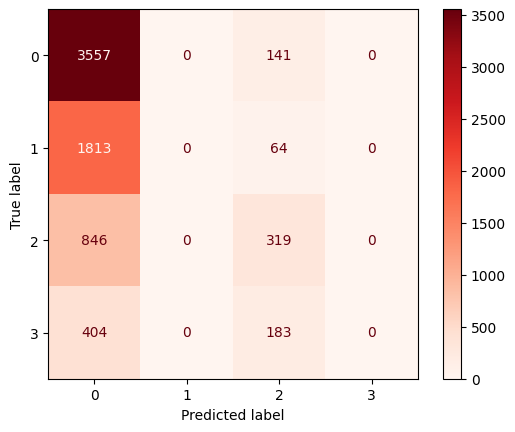

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred , cmap=plt.cm.Reds)
plt.show()

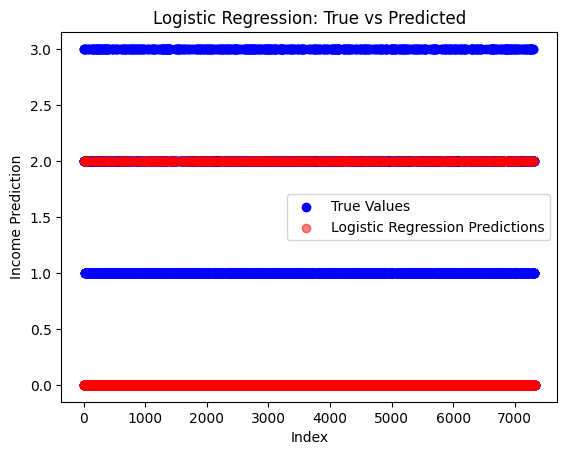

In [104]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Values')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Logistic Regression Predictions', alpha=0.5)
plt.title('Logistic Regression: True vs Predicted')
plt.xlabel('Index')
plt.ylabel('Income Prediction')
plt.legend()
plt.show()

In [105]:
# USING DECISION TREES
model_2 = DecisionTreeClassifier(max_depth=10)
model_2.fit(x_train , y_train)
y2_pred = model_2.predict(x_test)
m2_accuracy = accuracy_score(y_test , y2_pred)
print(f'Decision Tree Accuracy is : {m2_accuracy}')
info_2 = classification_report(y_test , y2_pred)
print(f'Model Info : \n {info_2}')

Decision Tree Accuracy is : 0.5812747372730995
Model Info : 
               precision    recall  f1-score   support

           0       0.60      0.94      0.73      3698
           1       0.73      0.08      0.15      1877
           2       0.49      0.53      0.51      1165
           3       0.35      0.03      0.06       587

    accuracy                           0.58      7327
   macro avg       0.54      0.39      0.36      7327
weighted avg       0.59      0.58      0.49      7327



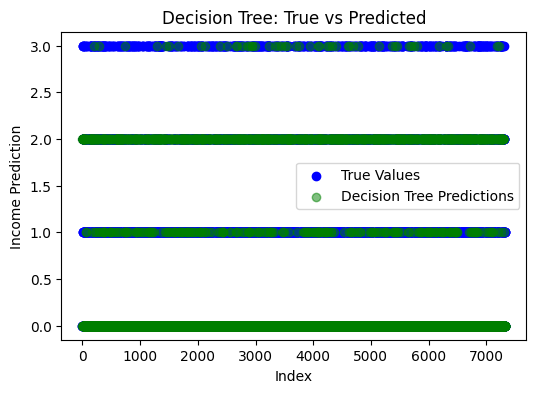

In [106]:
plt.figure(figsize=(6, 4))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Values')
plt.scatter(np.arange(len(y_test)), y2_pred, color='green', label='Decision Tree Predictions', alpha=0.5)
plt.title('Decision Tree: True vs Predicted')
plt.xlabel('Index')
plt.ylabel('Income Prediction')
plt.legend()
plt.show()


In [107]:
# USING DEEP LEARNING
model_3 = StandardScaler()
x_train_scaled = model_3.fit_transform(x_train)
x_test_scaled = model_3.transform(x_test)

In [108]:
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [109]:
nn_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
nn_model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3503 - loss: nan
Epoch 2/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5061 - loss: nan
Epoch 3/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5070 - loss: nan
Epoch 4/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5045 - loss: nan
Epoch 5/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5068 - loss: nan
Epoch 6/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5091 - loss: nan
Epoch 7/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5082 - loss: nan
Epoch 8/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5075 - loss: nan
Epoch 9/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5071 - loss: nan
Epoch 10/10
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5096 - loss: nan


In [110]:
nn_predictions = (nn_model.predict(x_test_scaled) > 0.5)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Accuracy: 0.5047086119830763
